<a href="https://colab.research.google.com/github/elizadana29/GG3209IRP/blob/main/220012316_IPR_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Criteria Evaluation of Suitability for Solar Farms in Kent, England

* **Authors:** Eliza Dana

* **Student ID:** 220012316

* **Date:** 10 December, 2024

**Abstract:**

Researchers are focusing on determining suitable land for solar farms as more countries commit to reducing their carbon emissions and increasing renewable energy outputs. This paper discusses the land suitability in Kent, England for a new solar farm using QGIS and a Multi-Criteria Analysis. Six total factors (aspect, solar irradiance, proximity to power) and constraints (wetlands, forested land, built-up land) are identified and combined to highlight the most suitable areas of Kent to build a new solar farm. Academic research was used to consider different constraint weights. The suitability map was then split into four categories: high, medium, low, and very low/no suitability for solar farms. This approach aims to reduce the time and money needed to determine suitable areas for a potential solar farm.

**Keywords:** Kent, Solar, Solar Power, Solar Farms, Renewables, Multi Criteria Evaluation, Suitability, Power Lines, Power Towers, Slope, Aspect, Solar Irradiance, Built-up Land

# GitHub Repository
- **GitHub Link:** https://github.com/elizadana29/GG3209IRP.git

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

1.   Introduction
2.   Methodology and Data
3.   Results
4.   Discussion
5.   Conclusion
6.   References
7.   Appendix







## 1. Introduction

The sun is an inexhaustible power source – it single-handedly can fulfill humanity’s energy needs; it can supply the amount of energy humans need for a year in just one hour (Hayat et al 2019). Despite being a clean, everlasting energy source, solar energy is not maximized. However, it is becoming increasingly important in reducing carbon emissions in many countries. Solar energy produces both heat and electricity, providing the potential to be used across many different industrial sectors. Solar panel technology is always improving, allowing power transmission to become increasingly efficient, highlighting solar power as a suitable and efficient renewable energy source. China, Japan, Germany, and the United States lead the global charge in solar power, paving the path for other countries to follow suit.


The United Kingdom aims to reduce carbon emissions by 75% by 2037 and reach net zero carbon emissions by 2050 (Department for Energy Security, 2023). Many of these goals related to carbon emission reduction can be reached through investments in renewable energy such as hydro, wind, and solar power. A common misconception is that the United Kingdom’s weather may not be suitable for solar power, however, solar power uses daylight to function, not necessarily direct sunlight, causing many areas of the United Kingdom to have high potential for solar power (Jha 2011). In its 2024 manifesto, the Labour Party committed to decarbonizing the UK's electricity system by 2030 (Coleman, 2024). Regarding solar power, the party committed to 'triple solar power' by 2030 (Labour Party 2024; Coleman, 2024). These commitments provide a framework for the United Kingdom to build more solar panels and solar farms, large fields of solar panels. As one of the sunniest places in the United Kingdom, averaging 1,614 hours of sunlight annually compared to the national average of 1,402 hours (Met Office, 2024), Kent is one of the most suitable regions for solar power. Assessing areas for solar farm suitability is essential to Labour’s manifesto of tripling solar power by 2030 and reaching the United Kingdom’s goal for net zero carbon emissions by 2050. This report will use this context to address the question "Which areas of Kent are most suitable for implementing a new solar farm?"

During this report, I will examine this research question through a Multi-Criteria Evaluation. I will look at three factors (slope aspect, solar radiance, proximity to power lines), as well as three constraints (built-up land, forested areas, and wetlands) to determine which areas of Kent are best suited to implement a new solar farm.


## 2. Methodology and Data

In [38]:
# Import necessary libraries for your project
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import numpy as np
import contextily as ctx
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio

In [ ]:
pip install contextily

In [76]:
from rasterio import plot
from tabulate import tabulate

2.1 Study Area:

This study focuses on Kent, a county in the South East of England. Kent is the largest county in the South East with an area of 3,550 km^2 inhabited by roughly 1.6 million people. The average population density is 450 people per km^2, and its main cities include Canterbury, Maidstone, Tonbridge, Dartford, and Ashford. The region is one of the sunniest in the United Kingdom and is dominated by silty and loamy soils, most of which have been drained for agriculture.


2.2 Data and Data Identification:

This study compiled data from open-sourced websites for a Multi-Criteria Evaluation analyzing the areas most suitable for building a solar farm in Kent. The study focused on three factors and three constraints. Solar radiation, aspect, and proximity to power lines are the most important in analyzing solar farm suitability as they optimize efficiency while minimizing operating and building costs (Merrounti, 2013; Hott 2012; Mierzwiak and Calka, 2017). Areas where it is impossible to build a solar farm such as wetlands, forested areas, and built-up areas were excluded from the model.

2.21 Solar Irradiance:

Solar Irradiance Data is essential to evaluating which areas are most suitable for solar panels. Three separate types of solar irradiance data are available: Direct Normal Irradiation (DNI), Global Horizontal Irradiation (GHI), and Diffuse Horizontal Irradiation (DIF). GHI and DIF are best for evaluating solar farm suitability as they refer to a horizontal surface area. This study used DIF data as the datasets include both reflected and direct sunlight in its totals which are important for calculating the potential solar irradiance (GlobalSolarAtlas, 2024). The solar radiation data used was obtained from [GlobalSolarAtlas](https://globalsolaratlas.info/download/united-kingdom).

2.22 Aspect:

Aspect Data is also essential to determining suitability for a solar farm. The orientation of the solar panels plays an important role in maximizing the potential exposure to solar radiation (Doorga et al 2019). As England is in the northern hemisphere, panels should face South, although panels or slopes facing East or West are still viable. Panels can also face North, however, these will be inefficient as they will receive smaller amounts of sunlight because of their orientation. Aspect data was obtained from [Eurostat.](https://ec.europa.eu/eurostat/web/gisco/geodata/digital-elevation-model/eu-dem)


2.23 Power Lines:

Proximity to Power Lines is also essential when determining which areas are most suitable for building a solar farm. Solar panels cannot just be installed – they must be connected to a power grid to function successfully. A solar farm must be located near power lines so it can easily be connected to a power grid. Solar farms should be as close to power lines as possible to minimize costs and maximize panel efficiency. Power Line data was obtained from ArcGISOnline.


2.24: Built-up areas, Wetlands, and Forested Areas:

As solar farms cannot be constructed on existing built-up areas, wetlands, or forested areas, this report excluded those areas during suitability analysis. Data for these rasters was obtained from the Office for National Statistics.

2.3: Method 1: Identifying and Mapping Constraints:

The first method included identifying and mapping the constraint areas. Each dataset was imported into QGIS, adjusted to the British National Grid, clipped, rasterized, and normalized for analysis with the rest of the data in this report for the Multi-criteria Evaluation. It was important to clip large datasets so they only included Kent and orient any datasets to the British National Grid so data would be aligned throughout calculations.

2.4: Method 2: Identifying and Mapping Factors:

As mentioned in section 2.2, solar irradiance, aspect, and power line proximity are the primary factors in determining suitability for solar farms in Kent. Similarly to the constraints, these factors were imported into QGIS, adjusted to the British National Grid, clipped, and normalized for analysis in context with each other and for Multi-criteria Evaluation.

2.5: Method 3: Creating a Suitability Map for Multi-Criteria Analysis:

Multi-criteria Analysis is important as it provides a formula for mapping the suitability of an area. Factors should be analyzed using different weights, their assigned weights depicted in Table 1. Factors are multiplied by their weights and added together, then multiplied by the constraint raster to provide a complete suitability analysis. Factors are weighted as they change throughout the map while constraints do not.


In [80]:
# Create a Table with pandas
table = {
    'Factor': ['Solar Irradiation', 'Proximity to Power', 'Aspect'],
    'Weight': [0.25, 0.40, 0.35],
}

# Convert to DataFrame
dataframe1 = pd.DataFrame(table)

# Display the table
dataframe1

#Label the table
print("Table 1: Factors and Weights for Solar Panel Suitability Analysis")
print(tabulate(dataframe1, headers='keys', tablefmt="grid"))

Table 1: Factors and Weights for Solar Panel Suitability Analysis
+----+--------------------+----------+
|    | Factor             |   Weight |
+====+====================+==========+
|  0 | Solar Irradiation  |     0.25 |
+----+--------------------+----------+
|  1 | Proximity to Power |     0.4  |
+----+--------------------+----------+
|  2 | Aspect             |     0.35 |
+----+--------------------+----------+


## 3. Results

After image processing was completed, the restraint rasters were weighted at 25% solar irradiance, 35% aspect, and 40% proximity to power as depicted in Table 1. Weights were determined using scientific research. Once multiplied with the constraints, the MCE was divided into four sections with different levels of suitability.


**3.1 Power Lines, Aspect, and Solar Irradiance Rasters:**

The following rasters (Figures 1, 2, and 3) highlight the power line proximity, aspect, and solar radiance constraints used in the MCE.

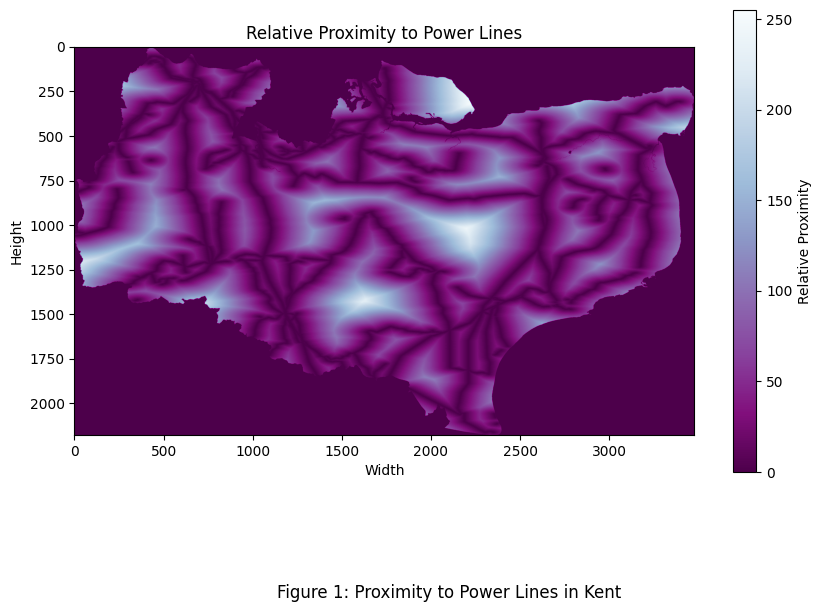

In [104]:
#Data Viewing: Kent Power Line Proximity Raster
#Plot Power Line Proximity Raster Using Matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(KentPowerLineProx_data, cmap='BuPu_r')
plt.colorbar(label='Relative Proximity')
plt.title("Relative Proximity to Power Lines")
plt.figtext(0.5, -0.1, 'Figure 1: Proximity to Power Lines in Kent', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

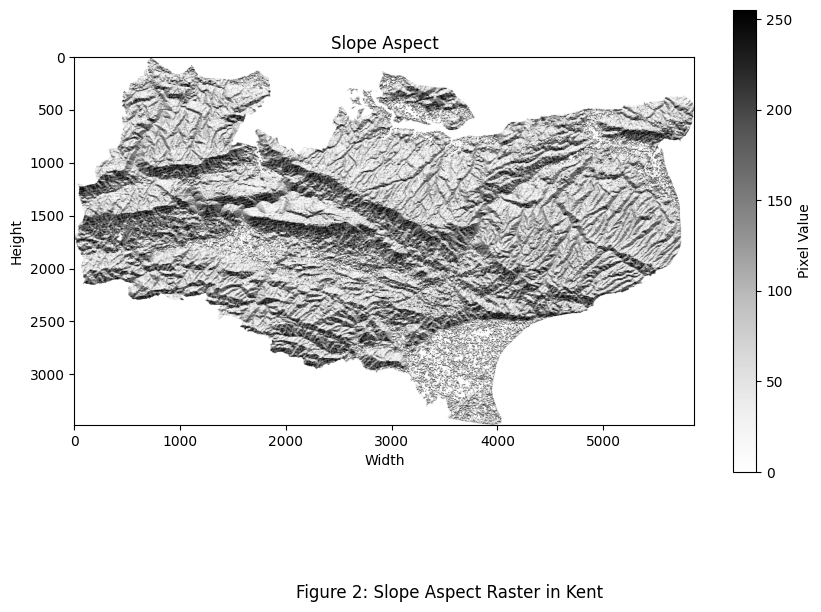

In [105]:
#Data Viewing: Kent Slope Aspect Raster
#Plot Slope Aspect Using matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(KentAspect_data, cmap='Greys')
plt.colorbar(label='Pixel Value')
plt.title("Slope Aspect")
plt.figtext(0.5, -0.1, 'Figure 2: Slope Aspect Raster in Kent', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

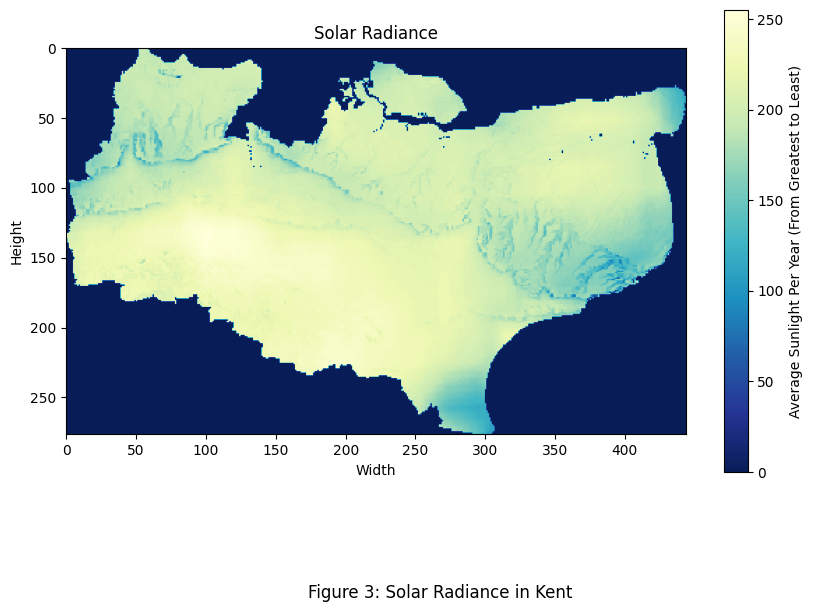

In [106]:
#Data Viewing: Solar Radiance in Kent
#Plot Solar Radiance Using matplotlib

plt.figure(figsize= (10, 6))
plt.imshow(SolarRadiance_data, cmap='YlGnBu_r')
plt.colorbar(label='Average Sunlight Per Year (From Greatest to Least)')
plt.title("Solar Radiance")
plt.figtext(0.5, -0.1, 'Figure 3: Solar Radiance in Kent', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

**3.2: Built-Up Areas, Wetlands, and Woodlands Raster**

The following rasters (Figures 4, 5, and 6) highlight built-up land, wetlands, and woodlands factors used in the MCE.



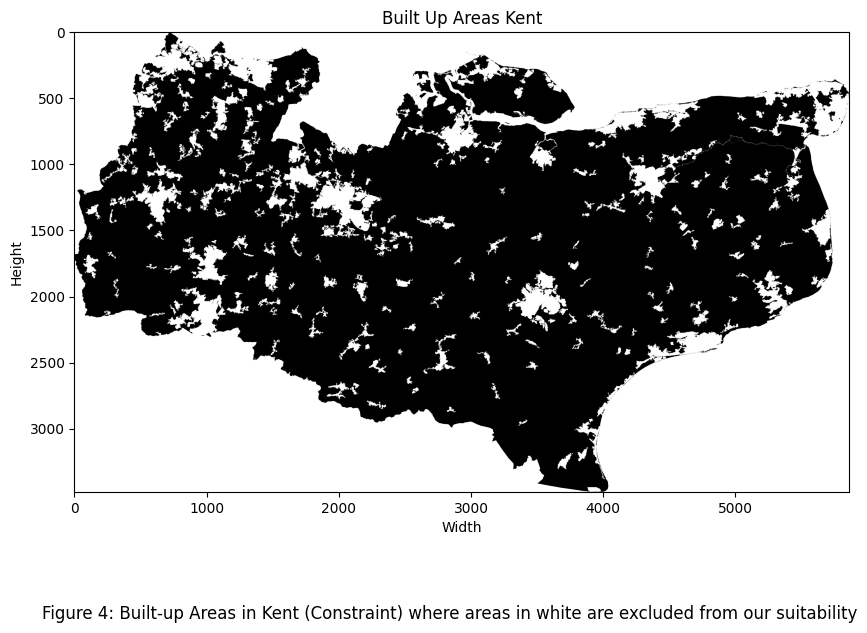

In [107]:
#Data Viewing: Developed Area Exclusion
#Plot Developed Areas Using matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(UrbanKent_data, cmap='Greys')
plt.title("Built Up Areas Kent")
plt.figtext(0.5, -0.1, 'Figure 4: Built-up Areas in Kent (Constraint) where areas in white are excluded from our suitability', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')

plt.show()

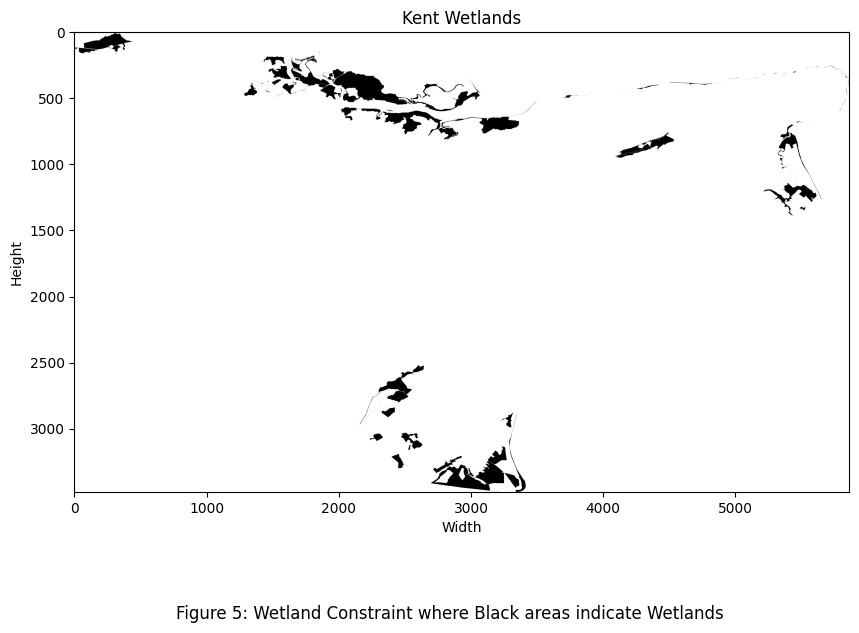

In [108]:
#Data Viewing: Kent Wetlands
#Plot Kent Wetlands Raster usign Matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(KentWetlands_data, cmap='Greys')
plt.title("Kent Wetlands")
plt.figtext(0.5, -0.1, 'Figure 5: Wetland Constraint where Black areas indicate Wetlands', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()



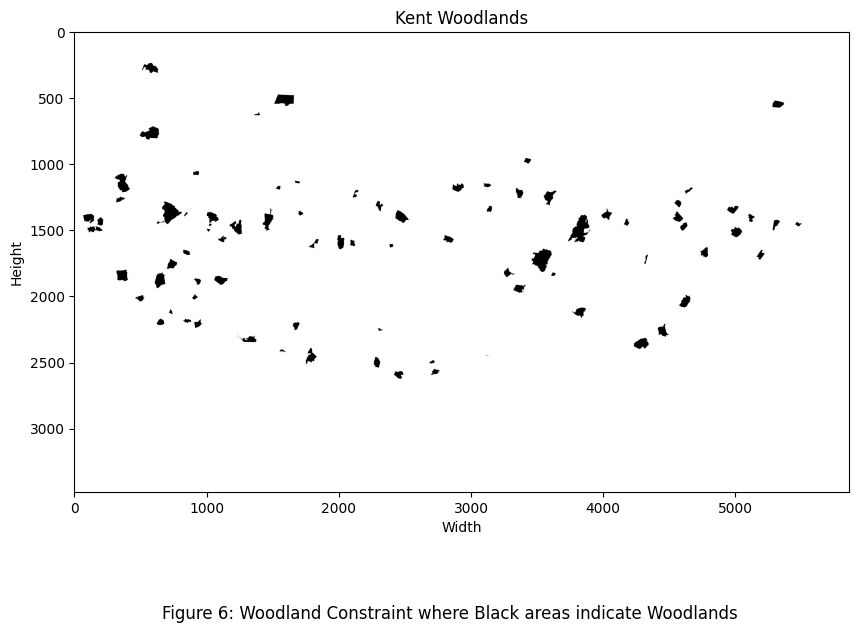

In [109]:
#Data Viewing: Kent Wetlands
#Plot Kent Woodlands Raster Using Matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(KentWoodlands_data, cmap='Greys')
plt.title("Kent Woodlands")
plt.figtext(0.5, -0.1, 'Figure 6: Woodland Constraint where Black areas indicate Woodlands', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


**3.3: Overall Kent Suitability:**

Figure 7 shows the result of a multi-criteria evaluation for a Solar Farm in Kent, England. Darker areas are more suitable for a solar farm, and lighter areas are not as suitable.

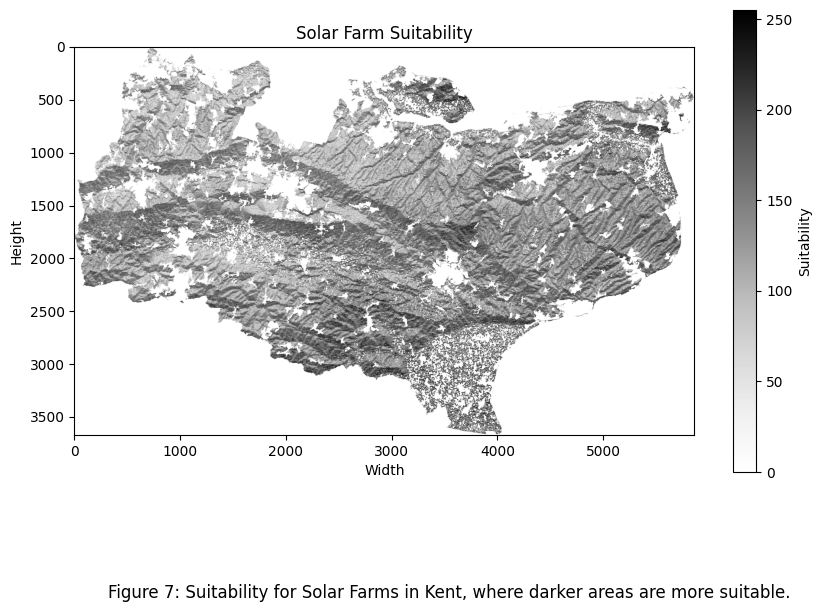

In [111]:
#Data Viewing: Kent Solar Farm Suitability
#Plot Solar Farm Suitability in Kent Using Matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(Suitability_data, cmap='Greys')
plt.colorbar(label='Suitability')
plt.title("Solar Farm Suitability")
plt.figtext(0.5, -0.1, 'Figure 7: Suitability for Solar Farms in Kent, where darker areas are more suitable.', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


(3672, 5864)
EPSG:27700
Max Value: 255
Min Value: 0


**3.4: MCE Classification**

The following map, Figure 8, divides the MCE into four classes: high, medium, low, and very low/no suitability for solar farms. This image can be used for recommending areas to build a solar farm.

Thresholds for classification: [100, 170, 200]
Unique values in classified data: [0 1 2 3]


<ipython-input-117-99e4a4056716>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('inferno', categoriesnum)


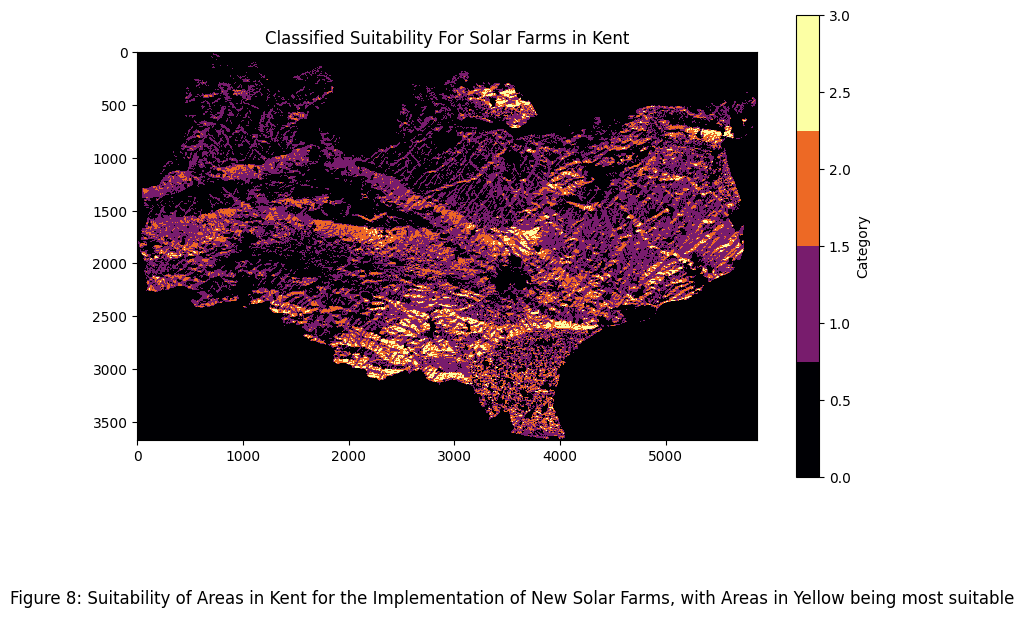

In [117]:
# Get the min and max values of the raster data
min_value = np.min(mce_raster)
max_value = np.max(mce_raster)

# Define the number of categories (4)
categoriesnum = 4

# Calculate the interval width for equal classification
interval = (max_value - min_value) / categoriesnum

# Define the threshold values for the categories
thresholds = [100, 170, 200]
print(f"Thresholds for classification: {thresholds}")

# Classify the data into four categories
# Use np.digitize to categorize values based on thresholds
classified_data = np.digitize(mce_raster, bins=thresholds)


# If there are NoData values, we can mask them
if no_data_value is not None:
    classified_data = np.ma.masked_equal(classified_data, no_data_value)

# Check the unique values (the categories)
print(f"Unique values in classified data: {np.unique(classified_data)}")

# Define a color map for the four categories (you can customize the colors)
color_map = plt.cm.get_cmap('inferno', categoriesnum)

# Plot the classified raster data
plt.figure(figsize=(10, 6))
plt.imshow(classified_data, cmap=color_map)
plt.colorbar(label='Category')
plt.title('Classified Suitability For Solar Farms in Kent')
plt.figtext(0.5, -0.1, 'Figure 8: Suitability of Areas in Kent for the Implementation of New Solar Farms, with Areas in Yellow being most suitable', ha='center', fontsize=12)
plt.show()


## 4. Discussion

This study developed a Multi-Criteria Evaluation to assess the suitability of developing land in Kent for a new solar farm. This study can help aid decision-makers in moving towards Labour's goal of tripling the UK’s solar energy output by 2030 and adopting renewable energy as a primary source of electricity moving forward.


**4.1 Most Suitable Areas of Kent for Solar Farms**

This study highlighted areas of Kent most and least suitable for implementing solar farms.

4.12 Factors and Roles in Suitability

4.121 Proximity to Power Lines:

As depicted in Figure 1, proximity to power greatly impacts where solar farms would be most efficient. Solar panels should be as close to electricity grids and sources as possible, reducing installation costs and improving efficiency once energy is transmitted, hence why areas closer to power lines are more suitable (Burdett-Gardiner, 2023). Kent is densely populated, and most of its area is within a reasonable distance of power lines. There is no official requirement for distance to power lines, and for the most part, recommendations state that solar farms should be located within five miles of an electrical grid (Transect, 2024). However, it is best to be closer to power if possible, and farms can still be built outside of these perimeters and connected to a further grid – they will just transmit power less efficiently and be more expensive to run.


4.122 Aspect

As depicted in Figure 2, slope aspect also plays a large role in assessing suitability for solar panels. The rasters in Figure 2 were normalized using an absolute value equation, marking panels facing south (180 degrees) as more efficient, and panels facing North (0 degrees) as less efficient. While solar panels can be built on slopes facing North, North-east, and North-west, panels facing in these directions will be less efficient as they will receive less sunlight per day. This constraint greatly impacted the MCE's output and is more important for efficiency in Kent than average solar irradiance.


4.123 Solar Irradiance:

As depicted in Figure 3, areas in the East and South of Kent receive more sunlight on average than areas in the North and West, causing them to be more favorable for the implementation of a solar farm. However, this does not mean that areas in the North and West are unsuitable for the implementation of a solar farm, these areas are still suitable and have more diffuse solar irradiation, the type of energy that solar panels absorb, than most areas in the rest of the United Kingdom (Kaiser, 2023). Solar panel performance relies on multiple factors such as the time of day, season, weather conditions, and geographical location. Kent is one of the most southern and sunniest areas of the United Kingdom, receiving more daylight hours than any other location. Highlighted areas receive more sunlight and generate greater direct and diffuse solar radiation, increasing the overall efficiency of the solar panels, even marginally, providing greater potential for the implementation of a solar farm.

**4.1 Limitations:**

4.21 Weights and Bias:

One concern with Multi-Criteria Evaluation is bias in assigning weights to each constraint. Different weighting is ultimately the author's decision and will greatly impact the outcome of the evaluation. Here, thorough research was used to determine the weighting of the constraints. Mierzwiak and Calka emphasize the importance of ‘environmental criteria’ such as solar radiation and aspect that help identify areas best suited for a solar farm (2017). These criteria, however, will vary largely depending on the identified area of interest. Because the average sunlight in the area is similar throughout the county, aspect, and proximity to power were more weighted in this report. Kent, England is becoming a hotspot for solar farms in the United Kingdom. Building more solar farms can help the United Kingdom reach carbon neutrality by 2050, and this report helps identify areas for further development.



4.22 Variables Limitations:

  4.221 Slope:

Other reports on Multi-Criteria Evaluations for solar farm suitability often eliminate areas above a 4 or 5% slope. Areas with slopes higher than this are challenging to build solar farms on, as farms should be placed on flat land where possible. Aspect data provide an idea of the locations of large slopes in suitability analysis, however, it is not a replacement for a slope constraint.

  4.223 Flood potential, temperature, humidity:

Additionally, many MCE’s evaluate flooding potential, temperature, and humidity as criteria for evaluation. While data on flooding potential may have been useful to ensure solar farms are not placed in flood-prone areas, wetlands are eliminated from the analysis, helping eliminate some areas that are more flood-prone than others. Despite being important to other MCE's, Kent does not vary much in terms of humidity and temperature. Furthermore, both variables are within a suitable range for solar panels to function well, making their incorporation unnecessary.

## Conclusion

The concept of solar power is not new to Kent: it is already one of the most popular regions in the United Kingdom for solar energy. This makes sense as solar power is more efficient in Kent due to its terrain, weather, and average sunlight than most other parts of the United Kingdom. However, more solar farms can always be built to work towards renewable energy goals.

"Efficiency" may be the most important takeaway from this report: solar panels must be built in areas where irradiance, proximity to power lines, and aspect combine for panels to be most efficient. Better efficiency will minimize costs while maximizing energy outputs.

While much of the world's produced solar energy comes from solar farms, panels can also be installed on roofs. Smaller, local-scale projects like these can help further increase the United Kingdom's renewable energy output and work towards carbon neutrality.

Multi-criteria evaluations can help planners and decision-makers decide where to implement new infrastructure such as large-scale projects like solar farms. This report used solar irradiance, power line proximity, and aspect data in addition to various land use constraints to identify the most suitable areas for a new solar farm and aid efforts in increasing the UK's solar output.




## References

1. Burdett-Gardiner, R. (n.d.). Top 5 Solar Farm Land Requirements. The Renewable Energy Hub. Retrieved December 11, 2024, from https://www.renewableenergyhub.co.uk/blog/top-5-solar-farm-land-requirements

2. Coleman, C. (2024). Renewable energy: Costs. https://lordslibrary.parliament.uk/renewable-energy-costs/

3. Department for Energy Security and Net Zero. (2023). Net Zero Government Initiative UK Roadmap to Net Zero Government Emissions. https://www.sustainability.gov/pdfs/united-kingdom-nzgi-roadmap.pdf

4. Doorga, J. R. S., Rughooputh, S. D. D. V., & Boojhawon, R. (2019). Multi-criteria GIS-based modelling technique for identifying potential solar farm sites: A case study in Mauritius. Renewable Energy, 133, 1201–1219. https://doi.org/10.1016/j.renene.2018.08.105

5. Faversham (Kent) Location-specific long-term averages. (n.d.). Met Office. Retrieved December 10, 2024, from https://www.metoffice.gov.uk/research/climate/maps-and-data/location-specific-long-term-averages/u10eu40xb

6. Global Solar Atlas. (n.d.). Global Solar Atlas. Retrieved December 8, 2024, from https://globalsolaratlas.info/support/faq

7. Hayat, M. B., Ali, D., Monyake, K. C., Alagha, L., & Ahmed, N. (2019). Solar energy—A look into power generation, challenges, and a solar-powered future. International Journal of Energy Research, 43(3), 1049–1067. https://doi.org/10.1002/er.4252

8. Hott, R., Santini, R., & Brownson, J. (2012). GIS-based spatial analysis for large-scale solar power and transmission line issues: Case study of Wyoming, U.S. Proceedings of the 41st American Solar Energy Society Meeting, 1-8.

9. Jha, A. (2011, June 26). UK’s biggest solar energy farm connects to national grid. The Guardian. https://www.theguardian.com/environment/2011/jun/27/uk-solar-energy-national-grid

10. Kaiser, C. (2023, June 8). Maximizing Solar Irradiance for Optimal Solar Farm Efficiency. Landgate. https://www.landgate.com/news/what-is-solar-irradiance-how-does-it-affect-solar-farms

11. Labour Party. (2024). Labour Party manifesto 2024. https://www.labour.org.uk/manifesto-2024

12. Merrouni, A., Ab. Mezrhab, A., & Mezrhab, A. (2013). CSP sites suitability analysis in the Eastern region of Morocco. Energy Procedia, 49, 1572-1580. https://doi.org/10.1016/j.egypro.2013.01.173

13. Mierzwiak, M., & Calka, B. (2017). Multi-Criteria Analysis for Solar Farm Location Suitability. Reports on Geodesy and Geoinformatics, 104. https://doi.org/10.1515/rgg-2017-0012

14. Solar Farm Land Requirements —Transect. (2023). Transect. Retrieved December 10, 2024, from https://www.transect.com/insights/solar-farm-land-requirements



## Appendix

This appendix includes data exploration for rasters and figures used above.

Section 1: Power Lines Data Exploration and Additional Information (Goes with Figure 1)

Raster Shape (Pixels): (1410, 2251)
Min Value: 0.0
Max Value: 1.0
Raster CRS: EPSG:27700


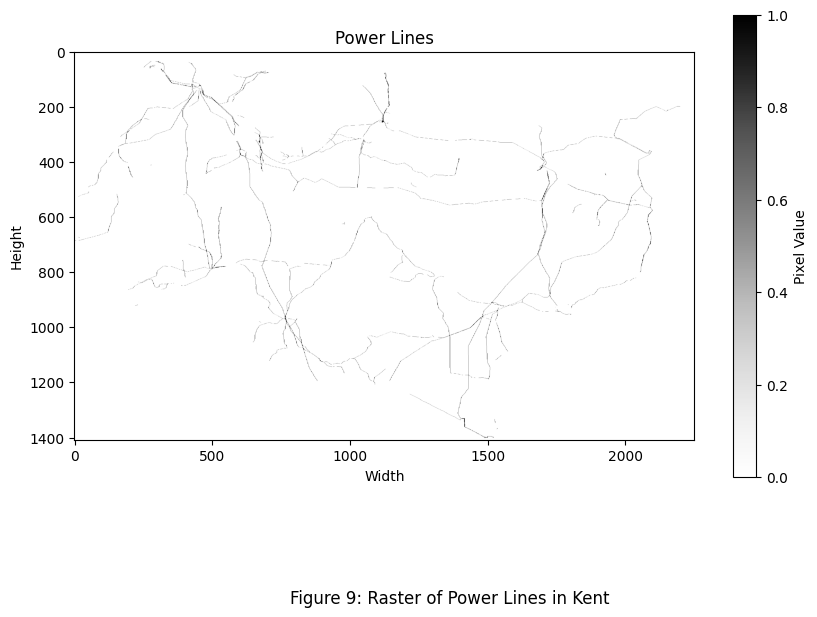

In [118]:
#Data Exploration: Kent Power Lines Raster

#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/Kent_PowerLinesFinal1.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/Kent_PowerLinesFinal1.tif') as KentPowerLines:
  KentPowerLines_data = KentPowerLines.read(1)
  print("Raster Shape (Pixels):", KentPowerLines_data.shape)
  print("Min Value:", KentPowerLines_data.min())
  print("Max Value:", KentPowerLines_data.max())
  print("Raster CRS:", KentPowerLines.crs)

  #Data Viewing: Kent Power Lines Raster
#Plot Power Lines Raster Using Matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(KentPowerLines_data, cmap='Greys')
plt.colorbar(label='Pixel Value')
plt.title("Power Lines")
plt.figtext(0.5, -0.1, 'Figure 9: Raster of Power Lines in Kent', ha='center', fontsize=12)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [119]:
#Data Exploration: Proximity to Power Lines in Kent (Goes with Figure 1)
# Code relevant to the Power Line Proximity Raster

#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/PowerLineProxNorm2.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/PowerLineProxNorm2.tif') as KentPowerLineProx:
  KentPowerLineProx_data = KentPowerLineProx.read(1)
  print("Raster Shape (Pixels):", KentPowerLineProx_data.shape)
  print("Min Value:", KentPowerLineProx_data.min())
  print("Max Value:", KentPowerLineProx_data.max())
  print("Raster CRS:", KentPowerLineProx.crs)

Raster Shape (Pixels): (2179, 3479)
Min Value: 0
Max Value: 255
Raster CRS: EPSG:27700


Section 2: Aspect Data Exploration (Goes with Figure 2)

In [ ]:
#Data Exploration: Kent Slope Aspect Raster
# Data Exploration goes with the Aspect Raster
#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/NormalizedSlopeAspect6.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/NormalizedSlopeAspect6.tif') as KentAspect:
  KentAspect_data = KentAspect.read(1)
  print("Raster Shape (Pixels):", KentAspect_data.shape)
  print("Min Value:", KentAspect_data.min())
  print("Max Value:", KentAspect_data.max())
  print("Raster CRS:", KentAspect.crs)

Section 3: Solar Radiance Data Exploration (Goes with Figure 3)

In [ ]:
#Data Exploration: Solar Radiance in Kent Raster
#Data Exploration pairs with the Solar Radiance Raster
#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/KentSolarRadiance2.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/KentSolarRadiance2.tif') as SolarRadiance:
  SolarRadiance_data = SolarRadiance.read(1)
  print("Raster Shape (Pixels):", SolarRadiance_data.shape)
  print("Min Value:", SolarRadiance_data.min())
  print("Max Value:", SolarRadiance_data.max())
  print("Raster CRS:", SolarRadiance.crs)

Section 4: Urban Area Exclusion Data Exploration (Goes with Figure 4)

In [ ]:
#Data Exploration: Urban Area Exclusion
# Data Exploration pairs with the Urban Exclusion Raster
#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/DevAreasKent1.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/DevAreasKent1.tif') as UrbanKent:
  UrbanKent_data = UrbanKent.read(1)
  print("Raster Shape (Pixels):", UrbanKent_data.shape)
  print("Min Value:", UrbanKent_data.min())
  print("Max Value:", UrbanKent_data.max())
  print("Raster CRS:", UrbanKent.crs)

Section 5: Wetlands Exclusion Data Exploration (Goes with Figure 5)

In [ ]:
#Data Exploration: Map of Wetlands in Kent
# Data Exploration pairs with the Wetlands Exclusion Raster
#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/WetlandsRaster1.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/WetlandsRaster1.tif') as KentWetlands:
  KentWetlands_data = KentWetlands.read(1)
  print("Raster Shape (Pixels):", KentWetlands_data.shape)
  print("Min Value:", KentWetlands_data.min())
  print("Max Value:", KentWetlands_data.max())
  print("Raster CRS:", KentWetlands.crs)

Section 6: Woodlands Exclusion Data Exploration (Goes with Figure 6)

In [ ]:
#Data Exploration: Map of Woodlands in Kent
#Data Exploration pairs iwth the Woodlands exlusion raster
#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/WoodlandsRaster1.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/WoodlandsRaster1.tif') as KentWoodlands:
  KentWoodlands_data = KentWoodlands.read(1)
  print("Raster Shape (Pixels):", KentWoodlands_data.shape)
  print("Min Value:", KentWoodlands_data.min())
  print("Max Value:", KentWoodlands_data.max())
  print("Raster CRS:", KentWoodlands.crs)

Section 7: Suitability Map Data Exploration (Goes with Figure 7)

In [ ]:
#Data Exploration: Suitability for Solar Farm in Kent
#Data Exploration pairs with the suitability raster
#Define file path in Google Drive
file_path = '/content/drive/My Drive/GG3209FinalLabOutputs/KentSolarSuitability2.tif'

#Open the geotiff file using Rasterio
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/KentSolarSuitability2.tif') as Suitability:
  Suitability_data = Suitability.read(1)
  print("Raster Shape (Pixels):", Suitability_data.shape)
  print("Min Value:", Suitability_data.min())
  print("Max Value:", Suitability_data.max())
  print("Raster CRS:", Suitability.crs)

Section 8: Final MCE Data Exploration (Goes with Figure 8)

In [112]:
# Open the raster file and set up MCE file for final classification
with rio.open('/content/drive/My Drive/GG3209FinalLabOutputs/KentSolarSuitability2.tif') as Suitability1:
    mce_raster = Suitability1.read(1)  # Read the first band of the raster
    no_data_value = Suitability1.nodata  # Get NoData value for the raster
    transform = Suitability1.transform  # Get transformation for georeferencing
    crs = Suitability1.crs  # Get CRS of the raster

# Check the raster's dimensions
print(mce_raster.shape)
print(crs)
print("Max Value:", mce_raster.max())
print("Min Value:", mce_raster.min())

(3672, 5864)
EPSG:27700
Max Value: 255
Min Value: 0


In [ ]:
#Finding High Suitability for Solar Farm Implementation

threshold = 200
highsuitable_area = np.where(mce_raster >= threshold, 1, 0)

plt.imshow(highsuitable_area, cmap='Greens')
plt.colorbar(label='Suitability (1=Suitable, 0=Not Suitable)')
plt.title('Areas of Kent with Medium Suitability for a Solar Farm')
plt.figtext(0.5, -0.1, 'Figure 11: Most Suitable Areas of Kent for a solar farm', ha='center', fontsize=12)
plt.show()